In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd 

# Load data

In [3]:
residualbind_k562_plotdf = pd.read_csv(f'../results/distilled_lentiMPRA_epistemic/K562/distillation_performance_plotdata.csv')
residualbind_hepg2_plotdf = pd.read_csv(f'../results/distilled_lentiMPRA_epistemic/HepG2/distillation_performance_plotdata.csv')

# parse residualbind data to only show uncertainty
residualbind_k562_uncertainty = residualbind_k562_plotdf[residualbind_k562_plotdf['output']!='activity']
residualbind_hepg2_uncertainty = residualbind_hepg2_plotdf[residualbind_hepg2_plotdf['output']!='activity']

# change original -> individual
mapping = {'aleatoric': 'individual', 
           'aleatoric_average': 'ensemble', 
           'distilled': 'distilled'}
residualbind_k562_uncertainty['Model'] = residualbind_k562_uncertainty['label'].map(mapping)
residualbind_hepg2_uncertainty['Model'] = residualbind_hepg2_uncertainty['label'].map(mapping)

/tmp/ipykernel_3521341/2638343042.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residualbind_k562_uncertainty['Model'] = residualbind_k562_uncertainty['label'].map(mapping)
/tmp/ipykernel_3521341/2638343042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residualbind_hepg2_uncertainty['Model'] = residualbind_hepg2_uncertainty['label'].map(mapping)


# Plot

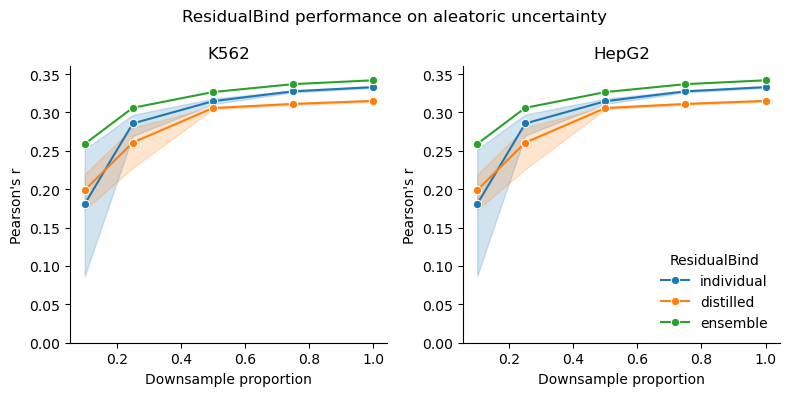

In [12]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

palette = {'individual': 'tab:blue', 'distilled':'tab:orange', 'ensemble':'tab:green'}


### k562
sns.lineplot(data=residualbind_k562_uncertainty[(residualbind_k562_uncertainty['output']=='aleatoric') & (residualbind_k562_uncertainty['metric']=='Pearson')], 
             x='downsample', y='value', hue='Model', marker='o', ax=axs[0], palette=palette)
axs[0].set_title('K562')
axs[0].legend(title='ResidualBind', frameon=False, loc='lower right')
axs[0].set_ylim([0,0.36])

### hepg2
sns.lineplot(data=residualbind_k562_uncertainty[(residualbind_k562_uncertainty['output']=='aleatoric') & (residualbind_k562_uncertainty['metric']=='Pearson')], 
             x='downsample', y='value', hue='Model', marker='o', ax=axs[1], palette=palette)
axs[1].set_title('HepG2')
axs[1].legend(title='ResidualBind', frameon=False, loc='lower right')
axs[1].set_ylim([0,0.36])

legend_order = ['individual','distilled','ensemble']
# Remove existing legends
axs[0].get_legend().remove()

# Get handles and labels for both plots
handles1, labels1 = axs[0].get_legend_handles_labels()

# Create dictionaries to map labels to handles
handle_dict1 = dict(zip(labels1, handles1))

# Create ordered lists of handles and labels
ordered_handles1 = [handle_dict1[label] for label in legend_order if label in handle_dict1]
ordered_labels = [label for label in legend_order if label in handle_dict1]

# Add new legends with consistent order
axs[1].legend(ordered_handles1, ordered_labels, title='ResidualBind', frameon=False, loc='lower right')

for ax in axs:
    ax.set_ylabel("Pearson's r")
    ax.set_xlabel('Downsample proportion')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('ResidualBind performance on aleatoric uncertainty')
fig.tight_layout()
fig.show()
fig.savefig("aleatoric_performance_curves.pdf")